In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs

In [4]:
all_years_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/all_years_combined_CCPF/all_years_CCPF_cpm_hindcast.hdf', 'table')
all_years_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/all_years_combined_CCPF/all_years_CCPF.hdf', 'table')
all_years_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/all_years_combined_CCPF/all_years_CCPF.hdf', 'table')



In [5]:
all_years_cpm = all_years_cpm[all_years_cpm.datetime.dt.year > 2000]

In [8]:
import cftime

time_reference = cftime.Datetime360Day(year=2001, month=1, day=1, hour=0) 
time_reference

all_years_pd = all_years_pd[all_years_pd.time >= time_reference].sort_values(by='timestr', ascending=True) ## for PD simulation

In [9]:
dataframes = [all_years_cpm, all_years_obs]

for df in dataframes:
    df.timestr = df.timestr.astype(str)
    df['datetime'] = pd.to_datetime(df.timestr.str.split(',\s*').str[0]) 
    set(df['datetime'])

In [12]:
## stats for pre and post filtering ##
# ---------------------------------------
print('Stats for all years combined:')
print(' ')

print(np.unique(all_years_obs.cell.values).shape[0], "cells in GPM")

print(np.unique(all_years_cpm.cell.values).shape[0], "cells in CPM_Hindcast")

print(np.unique(all_years_pd.cell.values).shape[0], "cells in CPM-PD")

print("Difference of {} cells between CPM-Hindcast and GPM".format((np.unique(all_years_cpm.cell.values).shape[0] - np.unique(all_years_obs.cell.values).shape[0])))

print("Difference of {} cells between CPM-PD and GPM".format((np.unique(all_years_pd.cell.values).shape[0] - np.unique(all_years_obs.cell.values).shape[0])))

# print("Total of", (np.unique(all_years_obs.cell.values).shape[0])-(np.unique(all_years_cpm.cell.values).shape[0]), "cells removed post-filtering")

# print(((((np.unique(all_years_obs.cell.values).shape[0])-(np.unique(all_years_cpm.cell.values).shape[0]))/(np.unique(all_years_obs.cell.values).shape[0]))*100), "% decrease")

Stats for all years combined:
 
16531 cells in GPM
21060 cells in CPM_Hindcast
20820 cells in CPM-PD
Difference of 4529 cells between CPM-Hindcast and GPM
Difference of 4289 cells between CPM-PD and GPM


**Loading in each year individually**

In [19]:
# ## UNFILTERED CPM-Hindcast tracks ##

# yr_1998_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_1998.h5', 'table')
# yr_1999_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_1999.h5', 'table')
# yr_2000_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2000.h5', 'table')
# yr_2001_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2001.h5', 'table')
# yr_2002_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2002.h5', 'table')
# yr_2003_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2003.h5', 'table')
# yr_2004_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2004.h5', 'table')
# yr_2005_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2005.h5', 'table')
# yr_2006_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2006.h5', 'table')
# yr_2007_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/init_tracks_cpm/tracks_2007.h5', 'table')

In [2]:
## CPM-Hindcast tracks ##

yr_1998_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/1998/CCPF_1998.hdf', 'table')
yr_1999_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/1999/CCPF_1999.hdf', 'table')
yr_2000_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2000/CCPF_2000.hdf', 'table')
yr_2001_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2001/CCPF_2001.hdf', 'table')
yr_2002_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2002/CCPF_2002.hdf', 'table')
yr_2003_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2003/CCPF_2003.hdf', 'table')
yr_2004_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2004/CCPF_2004.hdf', 'table')
yr_2005_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2005/CCPF_2005.hdf', 'table')
yr_2006_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2006/CCPF_2006.hdf', 'table')
yr_2007_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/merged/2007/CCPF_2007.hdf', 'table')

In [4]:
# ## Satellite Obs tracks ##

# yr_2001_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2001.h5', 'table')
# yr_2002_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2002.h5', 'table')
# yr_2003_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2003.h5', 'table')
# yr_2004_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2004.h5', 'table')
# yr_2005_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2005.h5', 'table')
# yr_2006_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2006.h5', 'table')
# yr_2007_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/init_tracks_obs/tracks_2007.h5', 'table')

In [3]:
## Satellite Obs tracks ##

yr_2001_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2001/CCPF_2001_INTERP.hdf', 'table')
yr_2002_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2002/CCPF_2002.hdf', 'table')
yr_2003_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2003/CCPF_2003.hdf', 'table')
yr_2004_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2004/CCPF_2004.hdf', 'table')
yr_2005_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2005/CCPF_2005.hdf', 'table')
yr_2006_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2006/CCPF_2006.hdf', 'table')
yr_2007_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/merged/2007/CCPF_2007.hdf', 'table')

In [6]:
# ## CPM-PD tracks ##

# yr_1998_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_1998.h5', 'table')
# yr_1999_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_1999.h5', 'table')
# yr_2000_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2000.h5', 'table')
# yr_2001_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2001.h5', 'table')
# yr_2002_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2002.h5', 'table')
# yr_2003_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2003.h5', 'table')
# yr_2004_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2004.h5', 'table')
# yr_2005_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2005.h5', 'table')
# yr_2006_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2006.h5', 'table')
# yr_2007_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/init_tracks/tracks_2007.h5', 'table')

In [4]:
## CPM-PD tracks ##

yr_1998_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/1998/CCPF_1998.hdf', 'table')
yr_1999_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/1999/CCPF_1999.hdf', 'table')
yr_2000_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2000/CCPF_2000.hdf', 'table')
yr_2001_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2001/CCPF_2001.hdf', 'table')
yr_2002_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2002/CCPF_2002.hdf', 'table')
yr_2003_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2003/CCPF_2003.hdf', 'table')
yr_2004_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2004/CCPF_2004.hdf', 'table')
yr_2005_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2005/CCPF_2005.hdf', 'table')
yr_2006_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2006/CCPF_2006.hdf', 'table')
yr_2007_pd = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/merged/2007/CCPF_2007.hdf', 'table')

In [5]:
## Finding the number of MCSs in each year in CPM and obs


dataframes = [yr_1998_cpm, yr_1999_cpm, yr_2000_cpm, yr_2001_cpm, yr_2002_cpm, yr_2003_cpm, yr_2004_cpm, yr_2005_cpm, yr_2006_cpm, yr_2007_cpm, yr_1998_pd, yr_1999_pd, yr_2000_pd, yr_2001_pd, yr_2002_pd, yr_2003_pd, yr_2004_pd, yr_2005_pd, yr_2006_pd, yr_2007_pd, yr_2001_obs, yr_2002_obs, yr_2003_obs, yr_2004_obs, yr_2005_obs, yr_2006_obs, yr_2007_obs]

unique_cells = []

for dataframe in dataframes:
    number = np.unique(dataframe.cell.values).shape[0]
    unique_cells.append(number) # Saving these values to a list


In [6]:
## First 7 values in the list are from the CPM and last 7 are from the obs

unique_cells_cpm = unique_cells[:10]
unique_cells_pd = unique_cells[10:20]
unique_cells_obs = unique_cells[20:]


In [7]:
unique_cells_cpm

[2639, 2885, 2828, 2667, 2690, 2733, 2776, 2613, 2725, 2776]

In [8]:
unique_cells_pd

[2661, 2888, 2831, 2765, 2709, 2694, 2834, 2680, 2817, 2763]

In [9]:
unique_cells_obs

[2332, 2290, 2336, 2234, 2510, 2519, 2310]

In [10]:
unique_cells_obs.insert(0, 0) ## inserting zeros to the list for years 1998, 1999 and 2000 as there's no satellite data
unique_cells_obs.insert(0, 0)
unique_cells_obs.insert(0, 0)
unique_cells_obs

[0, 0, 0, 2332, 2290, 2336, 2234, 2510, 2519, 2310]

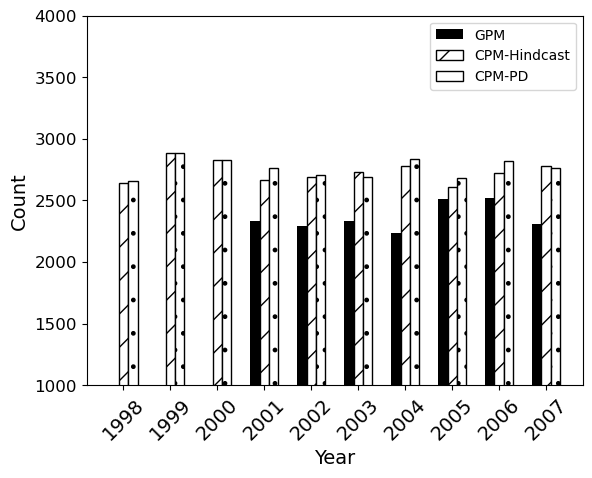

In [11]:
# Plot of total no. MCSs in each region in Jan 2005

import matplotlib
matplotlib.rcdefaults()
#plt.figure(figsize=(16,10))

N = 10
ind = np.arange(N) 
width = 0.2

# Choose the height of the bars
obs_height = unique_cells_obs
cpm_height = unique_cells_cpm
pd_height = unique_cells_pd


# Choose the names of the bars
bars = ('1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007')
x_pos = np.arange(len(bars))

# c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

obs = obs_height
bar1 = plt.bar(bars, obs, width, color = 'k',label='GPM')
  
cpm = cpm_height
bar2 = plt.bar(ind+width, cpm, width, color= 'white', edgecolor='k',hatch='/',label='CPM-Hindcast')

pd = pd_height
bar3 = plt.bar(ind+width*2, pd, width, color= 'white', edgecolor='k',hatch='.',label='CPM-PD')




# Create bars
# plt.bar(bars, obs_height, color=c, width=0.6)
# plt.bar(bars, cpm_height, color='white', edgecolor=c, hatch='/', width=0.6)
plt.xticks(ind+width*1, fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylim(1000, 4000)
#plt.title('Number of MCSs per Year',fontsize=15,loc='left')
plt.legend(loc='best')

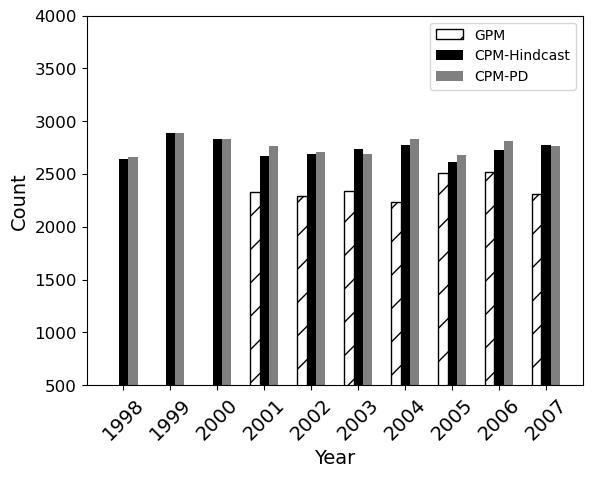

In [12]:
# Plot of total no. MCSs in each region in Jan 2005

import matplotlib
matplotlib.rcdefaults()
#plt.figure(figsize=(16,10))

N = 10
ind = np.arange(N) 
width = 0.2

# Choose the height of the bars
obs_height = unique_cells_obs
cpm_height = unique_cells_cpm
pd_height = unique_cells_pd


# Choose the names of the bars
bars = ('1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007')
x_pos = np.arange(len(bars))

# c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

obs = obs_height
bar1 = plt.bar(bars, obs, width, color= 'white', edgecolor='k',hatch='/',label='GPM')
  
cpm = cpm_height
bar2 = plt.bar(ind+width, cpm, width, color= 'k', label='CPM-Hindcast')

pd = pd_height
bar3 = plt.bar(ind+width*2, pd, width, color= 'grey',label='CPM-PD')




# Create bars
# plt.bar(bars, obs_height, color=c, width=0.6)
# plt.bar(bars, cpm_height, color='white', edgecolor=c, hatch='/', width=0.6)
plt.xticks(ind+width*1, fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylim(500, 4000)
#plt.title('Number of MCSs per Year',fontsize=15,loc='left')
plt.legend(loc='best')

## per sub-region: ##
### want to see if there is an increase in MCSs in ses region during el nino years ###

In [18]:
## CPM-PD ##
import pandas as pd

pd_nws = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/regional_box_tracks/per_mcs_nws_tracks_pd.hdf', 'table')
pd_nes = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/regional_box_tracks/per_mcs_nes_tracks_pd.hdf', 'table')
pd_nsa = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/regional_box_tracks/per_mcs_nsa_tracks_pd.hdf', 'table')
pd_sam = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/regional_box_tracks/per_mcs_sam_tracks_pd.hdf', 'table')
pd_ses = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks_INTERP/regional_box_tracks/per_mcs_ses_tracks_pd.hdf', 'table')


## CPM-H ##
h_nws = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/regional_box_tracks/per_mcs_nws_tracks_h.hdf', 'table')
h_nes = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/regional_box_tracks/per_mcs_nes_tracks_h.hdf', 'table')
h_nsa = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/regional_box_tracks/per_mcs_nsa_tracks_h.hdf', 'table')
h_sam = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/regional_box_tracks/per_mcs_sam_tracks_h.hdf', 'table')
h_ses = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_INTERP/regional_box_tracks/per_mcs_ses_tracks_h.hdf', 'table')


## OBS ##
o_nws = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_nws_tracks_obs.hdf', 'table')
o_nes = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_nes_tracks_obs.hdf', 'table')
o_nsa = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_nsa_tracks_obs.hdf', 'table')
o_sam = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_sam_tracks_obs.hdf', 'table')
o_ses = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/per_mcs_ses_tracks_obs.hdf', 'table')




In [52]:
h_ses

,cell,mean_num,max_num,min_num,lifetime,accumulated_precip,mean_rain_flag,max_rain_flag,accumulated_convective_precip,accumulated_heavy_precip,...,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_colocated_pixels,mean_colocated_pixels,mean_speed,total_distance,year,month
0,19992,3290,3569,2662,10,47847.666626,984,1216,45786.701294,10014.429001,...,-24.049999,-60.950001,-27.450001,-66.050003,277,195,11.959228,508.133549,1999,1
1,20035,1382,1780,880,10,11643.719360,187,334,11032.506683,5261.496094,...,-21.850000,-59.650002,-21.850000,-60.349998,113,76,9.525894,257.206165,2003,1
2,20043,4112,4640,2651,11,77673.739990,1197,1424,74308.708496,34036.338989,...,-19.950001,-60.650002,-19.750000,-60.549999,798,554,9.834023,321.713351,2004,1
3,20049,597,878,458,7,5763.404388,142,232,5477.893463,2464.827133,...,-23.150000,-46.049999,-22.950001,-45.250000,123,43,11.770913,435.183498,2004,1
4,20051,1221,2175,483,21,12914.617315,112,268,12301.530896,4075.454000,...,-31.150000,-67.150002,-32.549999,-65.050003,120,35,12.969764,1075.645830,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,200718198,1203,1393,876,7,14489.184326,292,348,14129.682861,7359.894104,...,-25.049999,-59.750000,-24.750000,-59.650002,208,128,10.864962,234.683186,2007,12
1773,200718247,5239,5778,4099,8,43243.896484,651,735,41390.589844,25889.844482,...,-20.150000,-60.450001,-22.450001,-60.049999,501,435,16.578256,417.772044,2007,12
1774,200718556,1415,1968,445,20,95054.398315,520,763,92450.204483,61107.538101,...,-23.250000,-36.750000,-23.250000,-36.750000,124,59,18.813366,1313.648130,2007,12
1775,200718751,2608,4075,628,38,57401.544176,319,706,52253.829921,22090.214546,...,-27.549999,-50.549999,-27.150000,-50.150002,51,4,14.789301,1969.934859,2007,12


In [41]:
## Finding the number of MCSs in each sub-region in each year and each dataset

## nws ##
dataframes = [pd_nws, h_nws, o_nws]

unique_cells_nws = []

for dataframe in dataframes:
    for i in range(1998, 2008):
        if dataframe is o_nws and i < 2001:
            number = 0
            unique_cells_nws.append(number)
        else:
            number = np.unique(dataframe[dataframe.year == i].cell.values).shape[0]
            unique_cells_nws.append(number)

unique_cells_nws_cpm = unique_cells_nws[:10] ## First 7 values in the list are from the CPM and last 7 are from the obs
unique_cells_nws_pd = unique_cells_nws[10:20]
unique_cells_nws_obs = unique_cells_nws[20:]

## nes ##
dataframes = [pd_nes, h_nes, o_nes]

unique_cells_nes = []

for dataframe in dataframes:
    for i in range(1998, 2008):
        if dataframe is o_nes and i < 2001:
            number = 0
            unique_cells_nes.append(number)
        else:
            number = np.unique(dataframe[dataframe.year == i].cell.values).shape[0]
            unique_cells_nes.append(number)

unique_cells_nes_cpm = unique_cells_nes[:10] ## First 7 values in the list are from the CPM and last 7 are from the obs
unique_cells_nes_pd = unique_cells_nes[10:20]
unique_cells_nes_obs = unique_cells_nes[20:]


## nsa ##
dataframes = [pd_nsa, h_nsa, o_nsa]

unique_cells_nsa = []

for dataframe in dataframes:
    for i in range(1998, 2008):
        if dataframe is o_nsa and i < 2001:
            number = 0
            unique_cells_nsa.append(number)
        else:
            number = np.unique(dataframe[dataframe.year == i].cell.values).shape[0]
            unique_cells_nsa.append(number)

unique_cells_nsa_cpm = unique_cells_nsa[:10] ## First 7 values in the list are from the CPM and last 7 are from the obs
unique_cells_nsa_pd = unique_cells_nsa[10:20]
unique_cells_nsa_obs = unique_cells_nsa[20:]


## sam ##
dataframes = [pd_sam, h_sam, o_sam]

unique_cells_sam = []

for dataframe in dataframes:
    for i in range(1998, 2008):
        if dataframe is o_sam and i < 2001:
            number = 0
            unique_cells_sam.append(number)
        else:
            number = np.unique(dataframe[dataframe.year == i].cell.values).shape[0]
            unique_cells_sam.append(number)

unique_cells_sam_cpm = unique_cells_sam[:10] ## First 7 values in the list are from the CPM and last 7 are from the obs
unique_cells_sam_pd = unique_cells_sam[10:20]
unique_cells_sam_obs = unique_cells_sam[20:]


## ses ##
dataframes = [pd_ses, h_ses, o_ses]

unique_cells_ses = []

for dataframe in dataframes:
    for i in range(1998, 2008):
        if dataframe is o_ses and i < 2001:
            number = 0
            unique_cells_ses.append(number)
        else:
            number = np.unique(dataframe[dataframe.year == i].cell.values).shape[0]
            unique_cells_ses.append(number)

unique_cells_ses_cpm = unique_cells_ses[:10] ## First 7 values in the list are from the CPM and last 7 are from the obs
unique_cells_ses_pd = unique_cells_ses[10:20]
unique_cells_ses_obs = unique_cells_ses[20:]



In [43]:
unique_cells_nws

[490,
 448,
 440,
 412,
 434,
 437,
 455,
 426,
 439,
 456,
 435,
 458,
 372,
 399,
 444,
 399,
 423,
 346,
 423,
 423,
 0,
 0,
 0,
 308,
 355,
 361,
 339,
 352,
 380,
 332]

Text(0.5, 1.0, 'ses')

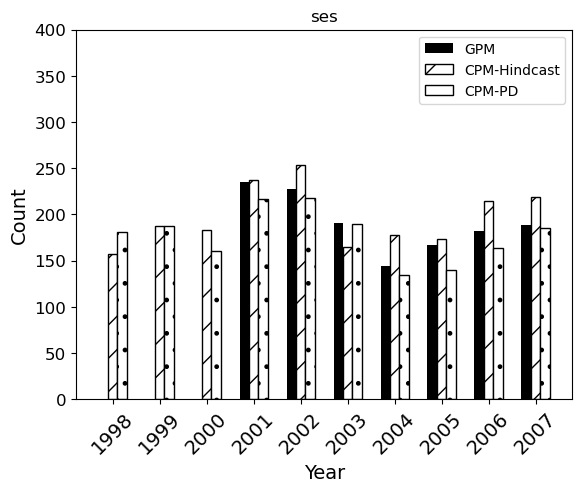

In [51]:
# Plot of total no. MCSs in each region in Jan 2005

import matplotlib
matplotlib.rcdefaults()
#plt.figure(figsize=(16,10))

N = 10
ind = np.arange(N) 
width = 0.2

# Choose the height of the bars
obs_height = unique_cells_ses_obs
cpm_height = unique_cells_ses_cpm
pd_height = unique_cells_ses_pd


# Choose the names of the bars
bars = ('1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007')
x_pos = np.arange(len(bars))

# c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

obs = obs_height
bar1 = plt.bar(bars, obs, width, color = 'k',label='GPM')
  
cpm = cpm_height
bar2 = plt.bar(ind+width, cpm, width, color= 'white', edgecolor='k',hatch='/',label='CPM-Hindcast')

pd = pd_height
bar3 = plt.bar(ind+width*2, pd, width, color= 'white', edgecolor='k',hatch='.',label='CPM-PD')




# Create bars
# plt.bar(bars, obs_height, color=c, width=0.6)
# plt.bar(bars, cpm_height, color='white', edgecolor=c, hatch='/', width=0.6)
plt.xticks(ind+width*1, fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylim(0, 400)
#plt.title('Number of MCSs per Year',fontsize=15,loc='left')
plt.legend(loc='best')
plt.title('ses')

## now just SON for ses region ##

In [60]:
pd_ses[pd_ses.month.isin([9, 10, 11])]

,cell,mean_num,max_num,min_num,lifetime,accumulated_precip,mean_rain_flag,max_rain_flag,accumulated_convective_precip,accumulated_heavy_precip,...,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_colocated_pixels,mean_colocated_pixels,mean_speed,total_distance,year,month
1119,199811863,2346,3156,639,14,31066.559937,601,848,29763.083130,267.124313,...,-36.250000,-62.150002,-34.150002,-63.450001,36,5,14.011785,619.861428,1998,9
1120,199811989,8932,12145,4075,48,253006.012985,974,1646,230000.903169,99634.983643,...,-20.150000,-39.349998,-20.549999,-40.549999,63,9,15.740376,2503.010830,1998,9
1121,199812369,1962,2804,594,21,82597.550293,499,765,80655.978943,46929.249268,...,-28.450001,-56.049999,-28.450001,-56.349998,198,60,15.079909,1084.473982,1998,9
1122,199812395,2405,3389,405,22,84747.836548,572,911,82217.712097,40779.430840,...,-26.549999,-60.849998,-26.450001,-60.849998,272,84,17.441230,1341.549335,1998,9
1123,199812439,1916,3067,901,13,53927.516602,693,859,52201.461670,20966.235168,...,-24.549999,-60.450001,-23.950001,-61.450001,49,22,15.985442,611.608080,1998,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,200716045,2756,6129,441,12,45809.105591,636,1264,42903.064270,21119.314941,...,-19.549999,-58.750000,-19.049999,-62.750000,668,236,14.248715,540.544244,2007,11
1939,200716056,1127,2298,481,8,18708.324646,282,707,18139.311340,11503.923584,...,-25.250000,-53.650002,-22.049999,-50.650002,180,58,12.154469,306.292627,2007,11
1940,200716227,693,1021,416,14,22134.875671,234,296,21433.651794,11181.096344,...,-22.150000,-63.450001,-21.850000,-63.349998,160,88,10.820179,506.384369,2007,11
1941,200716259,4107,6909,503,12,97973.945068,880,1490,95679.675293,64986.778320,...,-21.549999,-64.250000,-20.750000,-60.650002,1213,701,11.741342,464.957160,2007,11


In [55]:
## ses ##

## select just son months ##
pd_ses_son = pd_ses[pd_ses.month.isin([9, 10, 11])]
h_ses_son = h_ses[h_ses.month.isin([9, 10, 11])]
o_ses_son = o_ses[o_ses.month.isin([9, 10, 11])]

dataframes = [pd_ses_son, h_ses_son, o_ses_son]

unique_cells_ses_son = []

for dataframe in dataframes:
    for i in range(1998, 2008):
        if dataframe is o_ses and i < 2001:
            number = 0
            unique_cells_ses_son.append(number)
        else:
            number = np.unique(dataframe[dataframe.year == i].cell.values).shape[0]
            unique_cells_ses_son.append(number)

unique_cells_ses_son_cpm = unique_cells_ses_son[:10] ## First 7 values in the list are from the CPM and last 7 are from the obs
unique_cells_ses_son_pd = unique_cells_ses_son[10:20]
unique_cells_ses_son_obs = unique_cells_ses_son[20:]


Text(0.5, 1.0, 'ses (SON)')

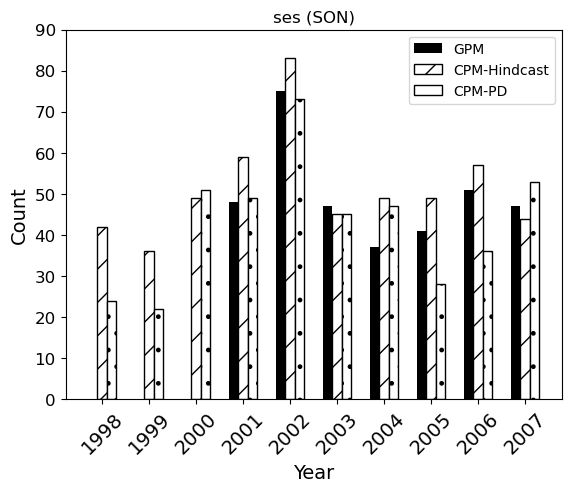

In [59]:
# Plot of total no. MCSs in each region in Jan 2005

import matplotlib
matplotlib.rcdefaults()
#plt.figure(figsize=(16,10))

N = 10
ind = np.arange(N) 
width = 0.2

# Choose the height of the bars
obs_height = unique_cells_ses_son_obs
cpm_height = unique_cells_ses_son_cpm
pd_height = unique_cells_ses_son_pd


# Choose the names of the bars
bars = ('1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007')
x_pos = np.arange(len(bars))

# c = ['teal', 'crimson', 'darkblue', 'orange', 'darkred']

obs = obs_height
bar1 = plt.bar(bars, obs, width, color = 'k',label='GPM')
  
cpm = cpm_height
bar2 = plt.bar(ind+width, cpm, width, color= 'white', edgecolor='k',hatch='/',label='CPM-Hindcast')

pd = pd_height
bar3 = plt.bar(ind+width*2, pd, width, color= 'white', edgecolor='k',hatch='.',label='CPM-PD')




# Create bars
# plt.bar(bars, obs_height, color=c, width=0.6)
# plt.bar(bars, cpm_height, color='white', edgecolor=c, hatch='/', width=0.6)
plt.xticks(ind+width*1, fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylim(0, 90)
#plt.title('Number of MCSs per Year',fontsize=15,loc='left')
plt.legend(loc='best')
plt.title('ses (SON)')

In [16]:
pd.set_option("display.max_columns", 50)

AttributeError: 'list' object has no attribute 'set_option'

In [57]:
yr_2001_pd.sort_values(by='timestr', ascending=True)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,...,w_5_down,max_precip_lat,max_precip_lon,min_tb_lat,min_tb_lon,max_w_up_lat,max_w_up_lon,max_w_down_lat,max_w_down_lon,colocated_pixels
2,0,14,382.866690,832.352042,14849,240,3,2001-01-01 00:30:00,2001-01-01 00:30:00,-24.533948,...,0.0,-26.25,-49.950001,-26.15,-50.049999,-26.25,-49.950001,-25.65,-52.450001,133
8,0,222,1079.204595,1324.245315,4523,240,9,2001-01-01 00:30:00,2001-01-01 00:30:00,3.667737,...,NaN,0,0,0,0,0,0,0,0,0
15,1,189,1093.378318,1324.285908,4028,240,16,2001-01-01 01:30:00,2001-01-01 01:30:00,4.241770,...,NaN,4.85,-32.450001,4.75,-32.349998,0,0,0,0,17
10,1,20,385.337890,827.547704,14788,240,11,2001-01-01 01:30:00,2001-01-01 01:30:00,-24.433867,...,NaN,-23.35,-50.75,-26.15,-50.049999,0,0,0,0,94
16,2,10,388.135097,822.044174,14078,240,17,2001-01-01 02:30:00,2001-01-01 02:30:00,-24.320578,...,NaN,-23.25,-50.75,-25.15,-53.349998,0,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103869,8636,318,897.258540,425.848631,9166,240,103870,2001-12-30 20:30:00,2001-12-30 20:30:00,-3.701081,...,NaN,-4.65,-66.75,-4.75,-67.050003,0,0,0,0,270
103890,8637,411,1174.337540,1259.160532,17121,240,103891,2001-12-30 21:30:00,2001-12-30 21:30:00,7.520621,...,0.0,7.05,-34.25,7.05,-34.25,5.45,-37.549999,7.25,-34.849998,55
103886,8637,292,903.665921,433.395823,10239,240,103887,2001-12-30 21:30:00,2001-12-30 21:30:00,-3.441581,...,NaN,0,0,0,0,0,0,0,0,0
103907,8638,311,1178.188323,1265.279755,16560,240,103908,2001-12-30 22:30:00,2001-12-30 22:30:00,7.676576,...,NaN,7.15,-34.849998,6.85,-34.150002,0,0,0,0,70
